In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries
from pycbc.waveform import get_td_waveform
from pycbc.detector import Detector
import lal

%matplotlib inline

In [23]:
# Reading parameters from a csv file
parameter_list = pd.read_csv('./pe_analysis.csv')
parameter = parameter_list.loc[4][:-2].to_dict()
parameter

{'approximant': 'IMRPhenomPv2',
 'coa_phase': 3.6118682013687446,
 'dec': -0.6879786485718081,
 'distance': 2073.4132601595006,
 'f_lower': 10.0,
 'f_ref': 10.0,
 'inclination': 2.343261838437284,
 'lambda1': 0.0,
 'lambda2': 0.0,
 'mass1': 46.03707989011012,
 'mass2': 21.723686035350504,
 'polarization': 1.9089239512321656,
 'ra': 1.6050759292390586,
 'spin1x': 0.0144365980931977,
 'spin1y': 0.597387124457439,
 'spin1z': -0.1651872258538661,
 'spin2x': 0.1050605521450363,
 'spin2y': 0.0343769068631778,
 'spin2z': -0.0147384670530493,
 'tc': 1251339704.750903}

In [45]:
ld = lal.__dict__
known_lal_names = [j for j in ld.keys() if "DETECTOR_PREFIX" in j]
known_prefixes = [ld[k] for k in known_lal_names]
known_names = [ld[k.replace('PREFIX', 'NAME')] for k in known_lal_names]
print(list(zip(known_prefixes, known_names)))

[('T1', 'TAMA_300'), ('V0', 'VIRGO_CITF'), ('V1', 'VIRGO'), ('G1', 'GEO_600'), ('H2', 'LHO_2k'), ('H1', 'LHO_4k'), ('L1', 'LLO_4k'), ('I1', 'LIO_4k'), ('C1', 'CIT_40'), ('E1', 'ET1_T1400308'), ('E2', 'ET2_T1400308'), ('E3', 'ET3_T1400308'), ('E0', 'ET0_T1400308'), ('K1', 'KAGRA'), ('U1', 'ACIGA'), ('A1', 'ALLEGRO_320'), ('O1', 'AURIGA'), ('X1', 'EXPLORER'), ('N1', 'Nautilus'), ('B1', 'NIOBE')]


In [40]:
# Get a waveform timeseries from the parameters and project it into the detectors
hp, hc = get_td_waveform(parameter, delta_t=1/4096)
wav_in_H1 = Detector('H1').project_wave(hp, hc,
                                        ra=parameter['ra'] ,
                                        dec=parameter['dec'] ,
                                        polarization=parameter['polarization'])
wav_in_L1 = Detector('L1').project_wave(hp, hc,
                                        ra=parameter['ra'] ,
                                        dec=parameter['dec'] ,
                                        polarization=parameter['polarization'])
wav_in_V1 = Detector('V1').project_wave(hp, hc,
                                        ra=parameter['ra'] ,
                                        dec=parameter['dec'] ,
                                        polarization=parameter['polarization'])
wav_in_G1 = Detector('G1').project_wave(hp, hc,
                                        ra=parameter['ra'] ,
                                        dec=parameter['dec'] ,
                                        polarization=parameter['polarization'])
wav_in_K1 = Detector('K1').project_wave(hp, hc,
                                        ra=parameter['ra'] ,
                                        dec=parameter['dec'] ,
                                        polarization=parameter['polarization'])
wav_in_T1 = Detector('T1').project_wave(hp, hc,
                                        ra=parameter['ra'] ,
                                        dec=parameter['dec'] ,
                                        polarization=parameter['polarization'])

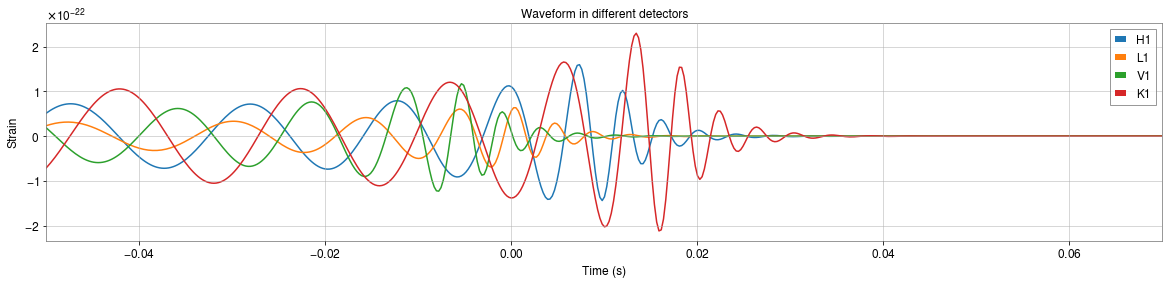

In [48]:
plt.figure(figsize=(20,4))
plt.plot(wav_in_H1.sample_times, wav_in_H1, label='H1')
plt.plot(wav_in_L1.sample_times, wav_in_L1, label='L1')
plt.plot(wav_in_V1.sample_times, wav_in_V1, label='V1')
# plt.plot(wav_in_G1.sample_times, wav_in_G1, label='G1')
plt.plot(wav_in_K1.sample_times, wav_in_K1, label='K1')
# plt.plot(wav_in_T1.sample_times, wav_in_T1, label='T1')
plt.title('Waveform in different detectors')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim([-0.05, 0.07])
plt.legend()
plt.show()

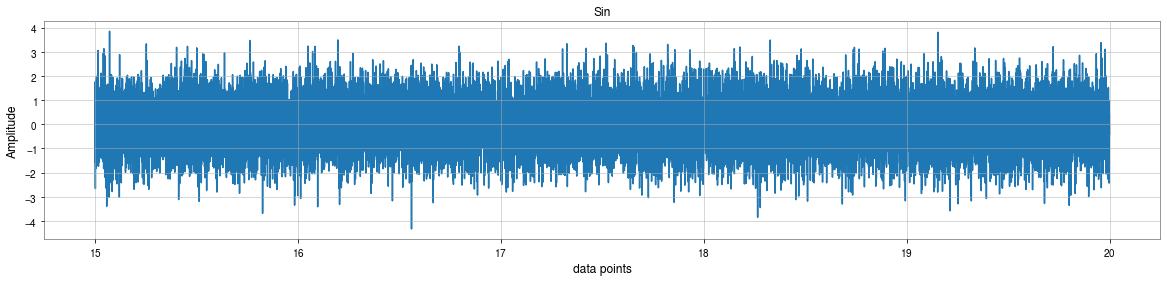

In [69]:
f, fs, duration = 60, 4096, 30
# X = np.linspace(0, 2*np.pi*f*duration, fs*duration)
# wave = np.sin(X)
# wave = np.random.normal(loc=0, scale=1, size=fs*duration)
wave = TimeSeries.read('./gaussiaon.gwf', channel='GAUSSIAN', start=15, end=20)

plt.figure(figsize=(20,4))
plt.plot(wave.times, wave)
plt.title('Sin')
plt.xlabel('data points')
plt.ylabel('Amplitude')
# plt.xlim([0, 1*fs])
plt.show()

/home/jerry/miniconda3/envs/igwn-py39/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


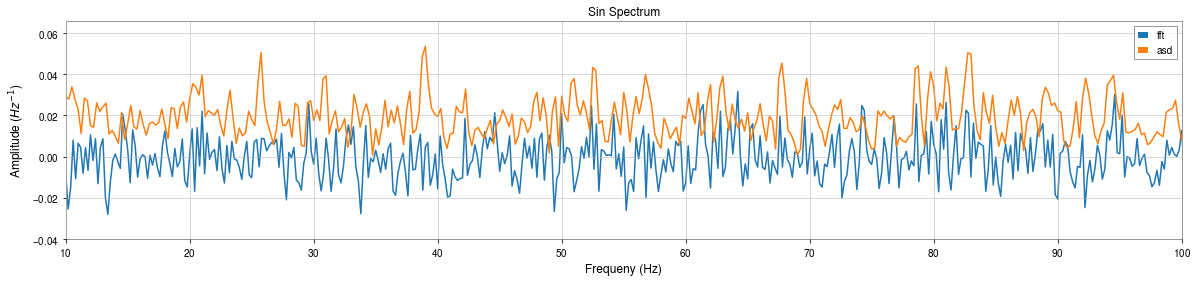

In [70]:
ts = TimeSeries(wave, sample_rate=fs)
ts_fft = ts.fft()
ts_asd = ts.asd(fftlength=4, overlap=2, window='hann', method='median')

plt.figure(figsize=(20,4))
plt.plot(ts_fft.frequencies, ts_fft, label='fft')
plt.plot(ts_asd.frequencies, ts_asd, label='asd')
plt.title('Sin Spectrum')
plt.xlabel('Frequeny (Hz)')
plt.ylabel(r'Amplitude ($Hz^{-1}$)')
# plt.yscale('log')
plt.xlim([10, 100])
# plt.ylim([1e-30, 1e-4])
# plt.xlim([62, 63])
# plt.ylim([-1e-4, 1e-4])
plt.legend()
plt.show()

In [60]:
ts.channel = 'GAUSSIAN'
ts.write('./gaussiaon.gwf', format='gwf')

In [64]:
wave = TimeSeries.read('./gaussiaon.gwf', channel='GAUSSIAN', start=15, end=20)

In [68]:
wave.times

<Index [15.        , 15.00024414, 15.00048828, ..., 19.99926758,
        19.99951172, 19.99975586] s>